## PCA
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability as possible. It transforms a set of possibly correlated variables into a smaller number of uncorrelated variables called principal components. The first principal component accounts for the largest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components. The use of PCA can simplify the complexity in high-dimensional data while retaining trends and patterns. This is particularly useful in processing data for machine learning algorithms, visualizing complex datasets, and in the preprocessing steps of predictive modeling.

           Company Name       Location  \
0  disability solutions   glendale, ca   
1  disability solutions   glendale, ca   
2    belmont university  nashville, tn   
3    belmont university  nashville, tn   
4   beck's hybrids\n4.6    atlanta, in   

                                       Job Title    job_category  python_yn  \
0                          advanced data analyst    Data Analyst        0.0   
1                          advanced data analyst    Data Analyst        0.0   
2  advancement services - temporary data analyst    Data Analyst        0.0   
3  advancement services – temporary data analyst    Data Analyst        0.0   
4                              ag data scientist  Data Scientist        0.0   

   R_yn  spark  aws  excel  avg_salary  
0   0.0    0.0  0.0    1.0    117500.0  
1   0.0    0.0  0.0    1.0    117500.0  
2   0.0    0.0  0.0    1.0    117500.0  
3   0.0    0.0  0.0    1.0    117500.0  
4   0.0    0.0  0.0    0.0    167440.0  
Original Data Sample:
   p

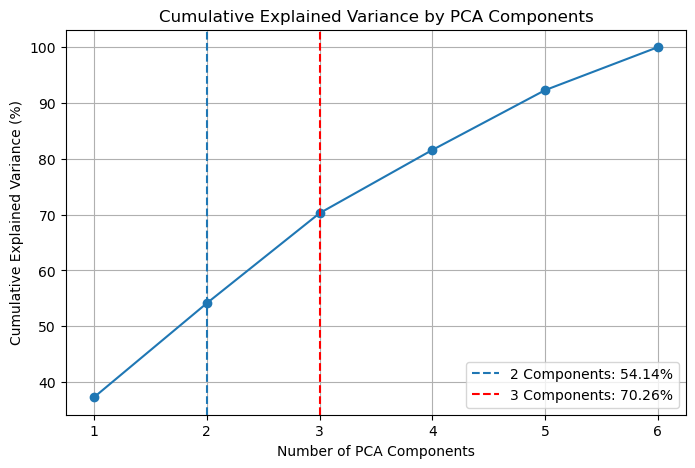

Cumulative explained variance by components:
[0.37295458 0.54137701 0.70262931 0.81587103 0.92301137 1.        ]


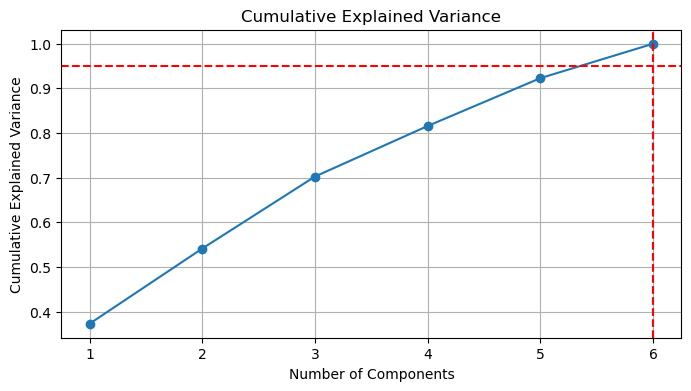

Number of components to retain at least 95% variance: 6
Top three eigenvalues:
[2.23968352 1.01141796 0.96835952]
2D PCA Sample:
        PC1       PC2
0 -1.426955 -0.049378
1 -1.426955 -0.049378
2 -1.426955 -0.049378
3 -1.426955 -0.049378
4 -0.383801 -0.212436
3D PCA Sample:
        PC1       PC2       PC3
0 -1.426955 -0.049378  0.364918
1 -1.426955 -0.049378  0.364918
2 -1.426955 -0.049378  0.364918
3 -1.426955 -0.049378  0.364918
4 -0.383801 -0.212436 -1.174971


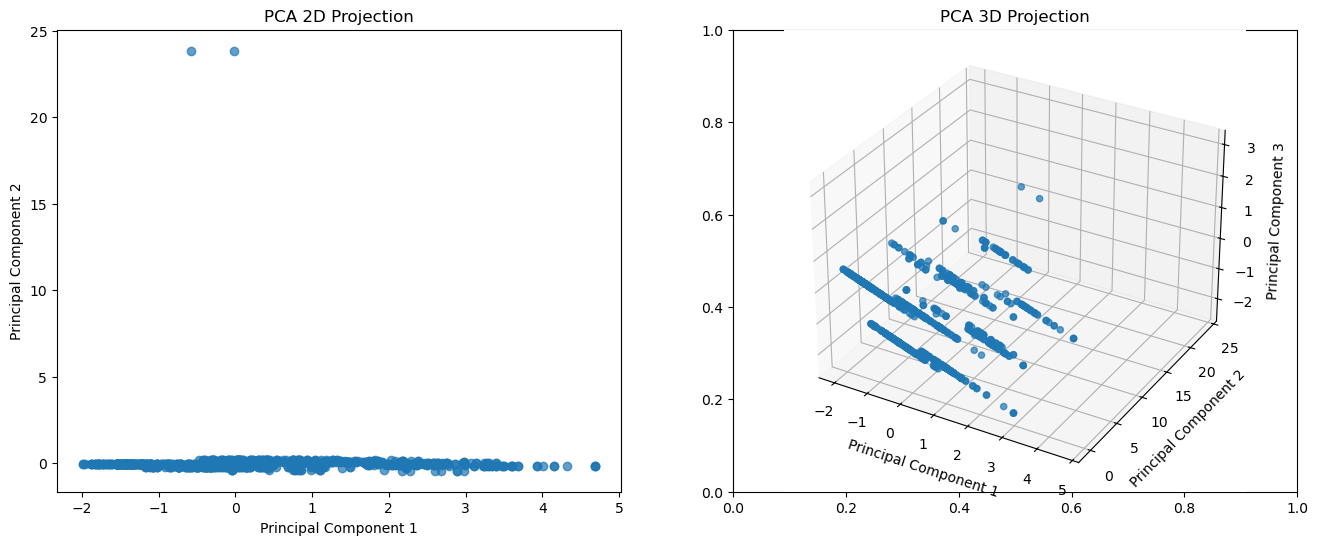

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
file_path = 'datasets/final_cleaned_data.csv' 
data = pd.read_csv(file_path)
print(data.head())
labels = data['job_category']  
features = data.drop(['Company Name', 'Location', 'Job Title', 'job_category'], axis=1)
data_numeric = data.select_dtypes(include=[np.number])
features_list = ['python_yn', 'R_yn', 'spark', 'aws', 'excel', 'avg_salary']
X = data_numeric[features_list]
X.to_csv('datasets/prepared_data.csv', index=False)

print("Original Data Sample:")
print(X.head())  # Print the first few rows of the original dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA transformations
pca = PCA()  # PCA without specifying the number of components to view all components
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

cumulative_variance_2d = sum(explained_variance[:2]) * 100  # for the first two components
cumulative_variance_3d = sum(explained_variance[:3]) * 100  # for the first three components

# Print the results
print(f"Information retained in 2D PCA Dataset: {cumulative_variance_2d:.2f}%")
print(f"Information retained in 3D PCA Dataset: {cumulative_variance_3d:.2f}%")

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
components = range(1, len(explained_variance) + 1)
cumulative_variance = np.cumsum(explained_variance) * 100
plt.plot(components, cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.axvline(x=2, linestyle='--', label='2 Components: {:.2f}%'.format(cumulative_variance_2d))
plt.axvline(x=3, linestyle='--', color='r', label='3 Components: {:.2f}%'.format(cumulative_variance_3d))
plt.legend()
plt.grid(True)
plt.show()
# Explain variance ratios
print("Cumulative explained variance by components:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

# Visualize cumulative variance to determine the number of components for 95% variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='r', linestyle='--')
plt.show()

# Print the number of components to retain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain at least 95% variance: {n_components_95}")

# Top three eigenvalues
top_three_eigenvalues = pca.explained_variance_[:3]
print("Top three eigenvalues:")
print(top_three_eigenvalues)

# Save 2D and 3D PCA projections to CSV
df_2d = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_2d.to_csv('datasets/pca_2d.csv', index=False)
df_3d = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
df_3d.to_csv('datasets/pca_3d.csv', index=False)

# Print sample data for 2D and 3D PCA projections
print("2D PCA Sample:")
print(df_2d.head())
print("3D PCA Sample:")
print(df_3d.head())

# Plot 2D and 3D PCA
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(df_2d['PC1'], df_2d['PC2'], alpha=0.7)
ax[0].set_title('PCA 2D Projection')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1] = plt.subplot(122, projection='3d')
ax[1].scatter(df_3d['PC1'], df_3d['PC2'], df_3d['PC3'], alpha=0.7)
ax[1].set_title('PCA 3D Projection')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].set_zlabel('Principal Component 3')
plt.show()


## Clustering

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


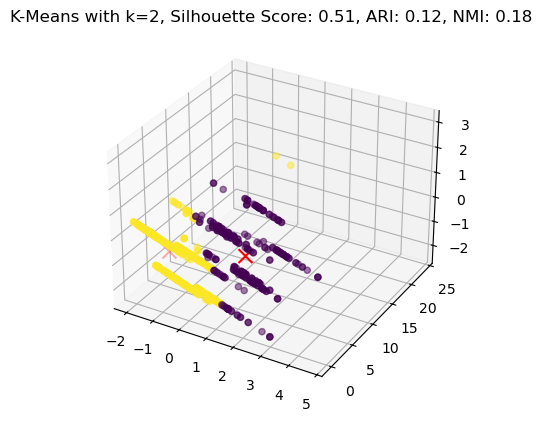

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


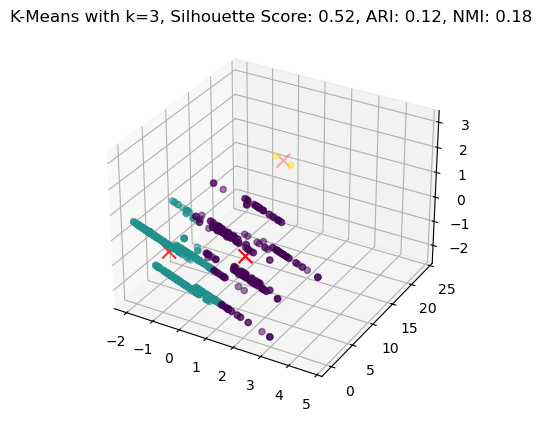

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


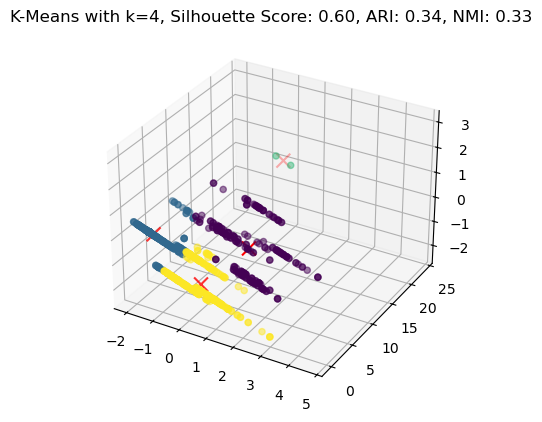

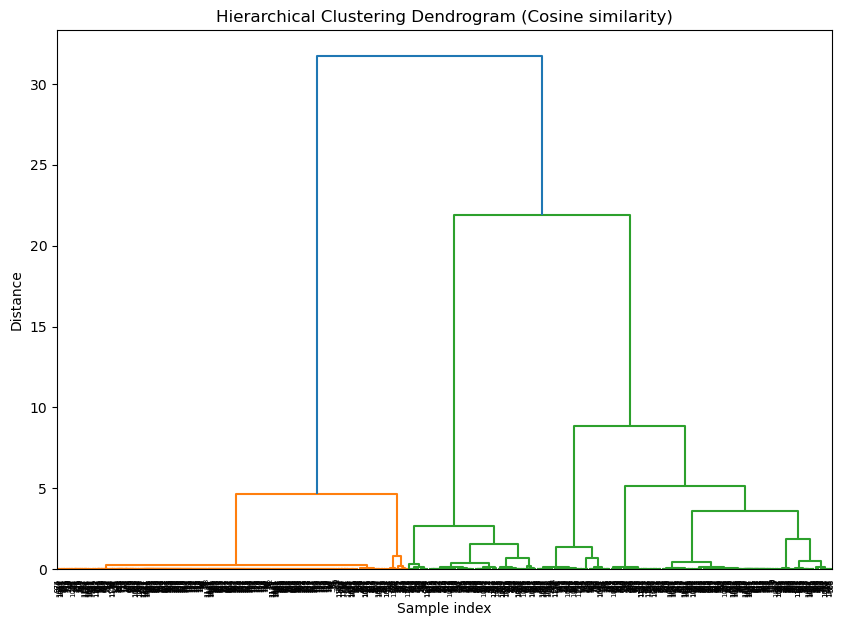

Hierarchical Clustering Silhouette Score (cosine): 0.78
ARI: 0.40
NMI: 0.35


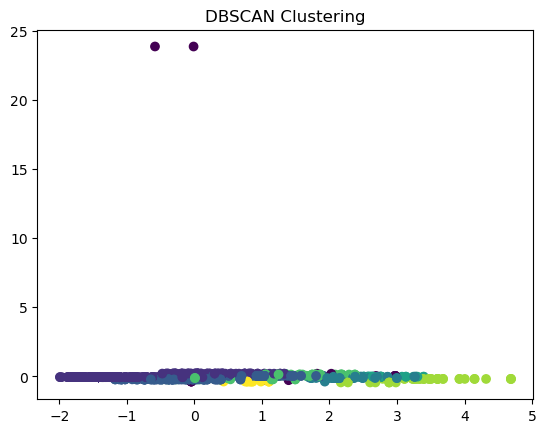

DBSCAN Clustering Silhouette Score: 0.52, ARI: 0.25, NMI: 0.24
Summary of Clustering Comparisons with True Labels:
K-means ARI scores: {2: 0.12061346764563033, 3: 0.12013334607947715, 4: 0.33657152241112354}
K-means NMI scores: {2: 0.1798465616028167, 3: 0.18031149896258558, 4: 0.3275853399869094}
Hierarchical ARI: 0.4035037713305081
Hierarchical NMI: 0.3519804215499391
DBSCAN ARI: 0.24509122294461405
DBSCAN NMI: 0.23701648353822535


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial.distance import pdist
# K-means Clustering with centroids
k_values = [2, 3, 4]
kmeans_scores = {}
kmeans_ari_scores = {}
kmeans_nmi_scores = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = kmeans.fit_predict(X_pca_3)
    score = silhouette_score(X_pca_3, clusters_kmeans)
    ari_score = adjusted_rand_score(labels, clusters_kmeans)
    nmi_score = normalized_mutual_info_score(labels, clusters_kmeans)
    kmeans_scores[k] = score
    kmeans_ari_scores[k] = ari_score
    kmeans_nmi_scores[k] = nmi_score

    # Plotting clusters and centroids in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=clusters_kmeans, cmap='viridis', alpha=0.5)
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=100, marker='x')  # Plot centroids
    ax.set_title(f'K-Means with k={k}, Silhouette Score: {score:.2f}, ARI: {ari_score:.2f}, NMI: {nmi_score:.2f}')
    plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_3)

# Hierarchical Clustering with Cosine Similarity
# Calculate the pairwise distance matrix using cosine similarity
distance_matrix = pdist(X_scaled, metric='cosine')

# Perform the hierarchical clustering (Ward's method)
Z = linkage(distance_matrix, method='ward')

# Form flat clusters
clusters_hierarchical = fcluster(Z, t=3, criterion='maxclust')

# Evaluate clusters
hierarchical_score = silhouette_score(X_scaled, clusters_hierarchical, metric='cosine')
hierarchical_ari = adjusted_rand_score(labels, clusters_hierarchical)
hierarchical_nmi = normalized_mutual_info_score(labels, clusters_hierarchical)

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Cosine similarity)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Print evaluation scores
print(f"Hierarchical Clustering Silhouette Score (cosine): {hierarchical_score:.2f}")
print(f"ARI: {hierarchical_ari:.2f}")
print(f"NMI: {hierarchical_nmi:.2f}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca_3)
dbscan_score = silhouette_score(X_pca_3, clusters_dbscan)
dbscan_ari = adjusted_rand_score(labels, clusters_dbscan)
dbscan_nmi = normalized_mutual_info_score(labels, clusters_dbscan)
plt.figure()
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
print(f"DBSCAN Clustering Silhouette Score: {dbscan_score:.2f}, ARI: {dbscan_ari:.2f}, NMI: {dbscan_nmi:.2f}")

# Summary of comparisons
print("Summary of Clustering Comparisons with True Labels:")
print("K-means ARI scores:", kmeans_ari_scores)
print("K-means NMI scores:", kmeans_nmi_scores)
print("Hierarchical ARI:", hierarchical_ari)
print("Hierarchical NMI:", hierarchical_nmi)
print("DBSCAN ARI:", dbscan_ari)
print("DBSCAN NMI:", dbscan_nmi)

## ARM

In [28]:
! pip install mlxtend

In [29]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

file_path = 'datasets//final_cleaned_data.csv' 
data = pd.read_csv(file_path)

transaction_data = data.apply(lambda x: x.dropna().astype(str).tolist(), axis=1)

te = TransactionEncoder()
te_ary = te.fit(transaction_data).transform(transaction_data)
df = pd.DataFrame(te_ary, columns=te.columns_)


df.to_csv('datasets//prepared_transaction_data.csv', index=False)  
print("Prepared transaction data saved to 'datasets//prepared_transaction_data.csv'")

print(df.head())


Prepared transaction data saved to 'datasets//prepared_transaction_data.csv'
    0.0  1-800-flowers.com, inc.\n2.8    1.0  100000.0  100880.0  101920.0  \
0  True                         False   True     False     False     False   
1  True                         False   True     False     False     False   
2  True                         False   True     False     False     False   
3  True                         False   True     False     False     False   
4  True                         False  False     False     False     False   

   102500.0  104000.0  106080.0  106948.5  ...  \
0     False     False     False     False  ...   
1     False     False     False     False  ...   
2     False     False     False     False  ...   
3     False     False     False     False  ...   
4     False     False     False     False  ...   

   womanhaven a center for family solutions  woodbridge, nj  \
0                                     False           False   
1                          

In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules.to_csv('datasets//association_rules.csv', index=False)
print("Association rules saved to 'datasets//association_rules.csv'")

rules.head()


Association rules saved to 'datasets//association_rules.csv'


c:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(1.0),(0.0),0.881223,1.000000,0.881223,1.000000,1.0,1.0,0.0,inf,0.0,0.881223,0.0,0.940611
1,(0.0),(1.0),1.000000,0.881223,0.881223,0.881223,1.0,1.0,0.0,1.0,0.0,0.881223,0.0,0.940611
2,(117500.0),(0.0),0.250655,1.000000,0.250655,1.000000,1.0,1.0,0.0,inf,0.0,0.250655,0.0,0.625328
3,(0.0),(117500.0),1.000000,0.250655,0.250655,0.250655,1.0,1.0,0.0,1.0,0.0,0.250655,0.0,0.625328
4,(182000.0),(0.0),0.010480,1.000000,0.010480,1.000000,1.0,1.0,0.0,inf,0.0,0.010480,0.0,0.505240


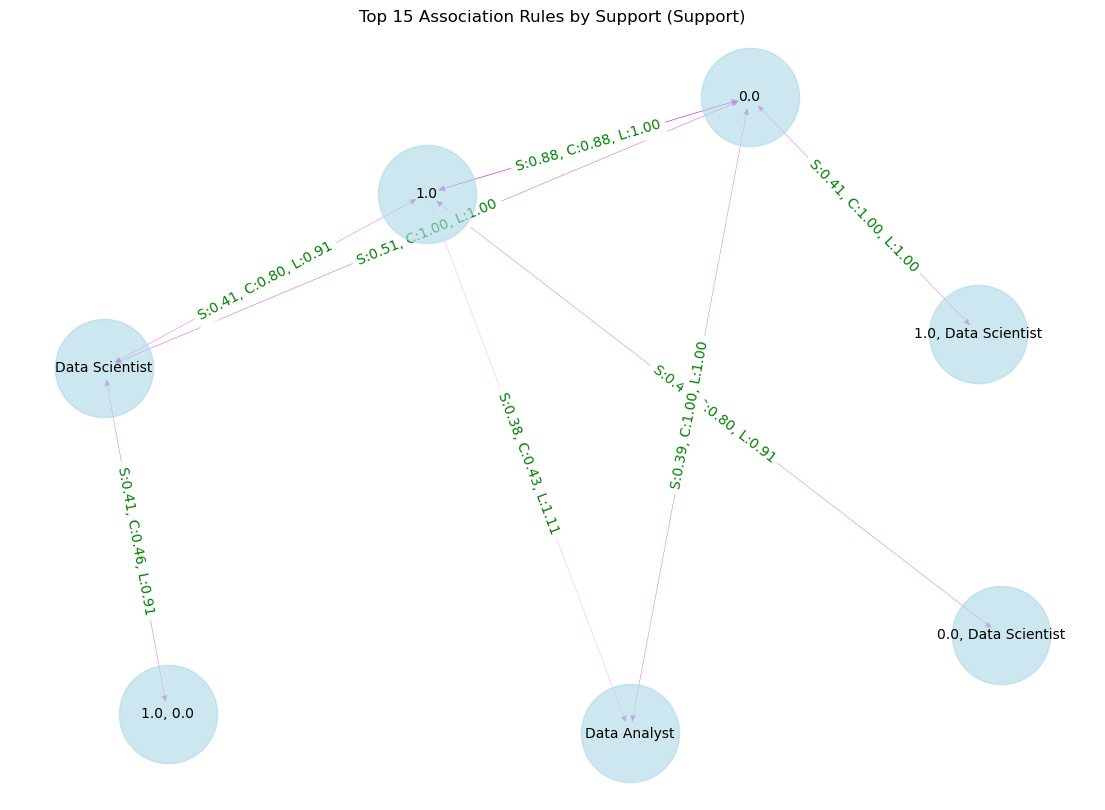

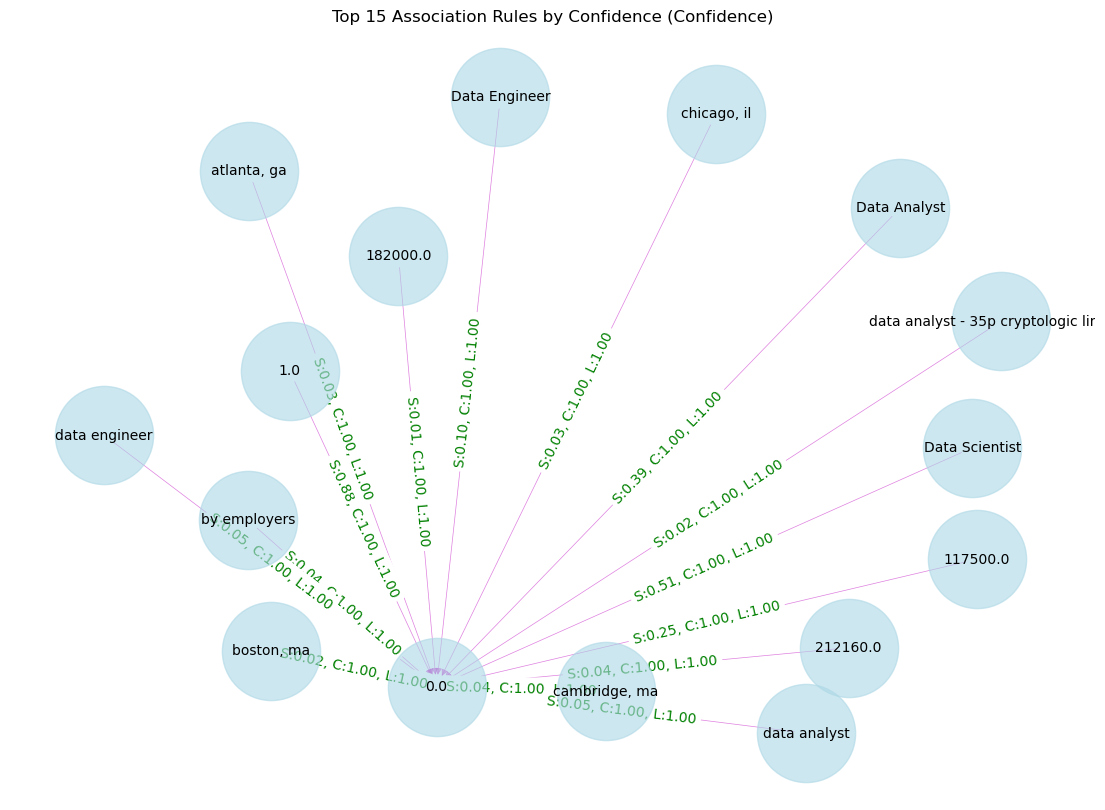

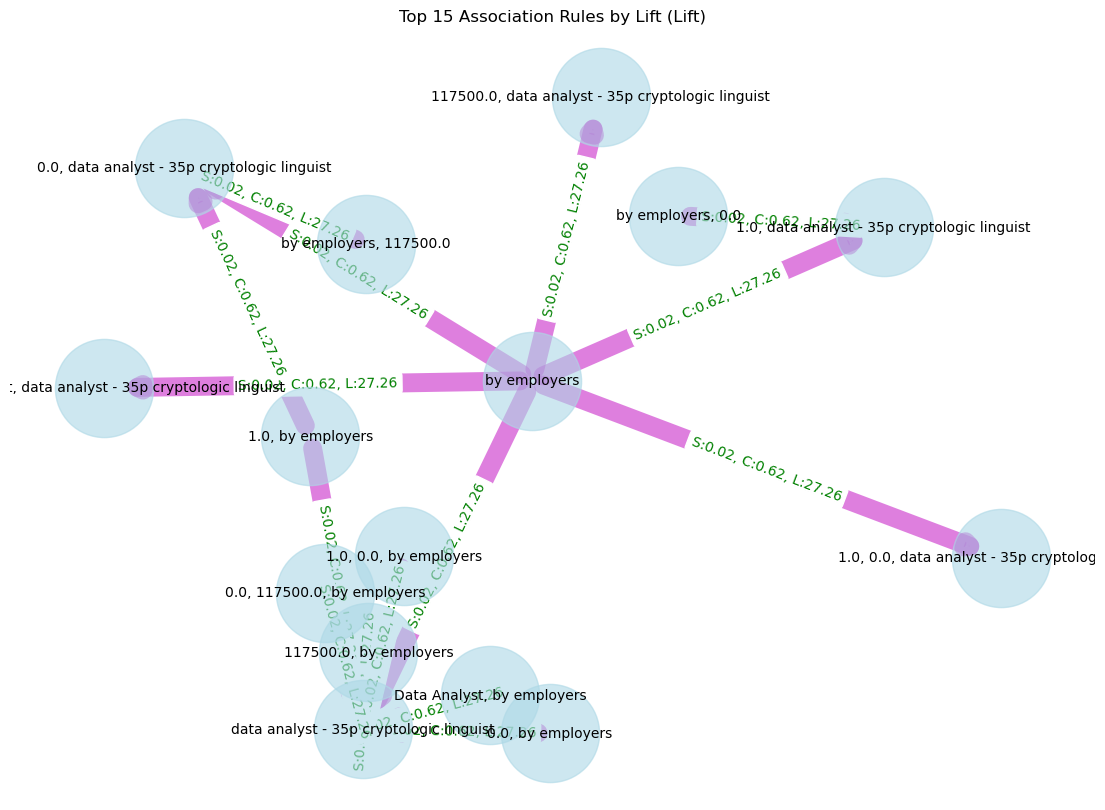

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(rules, metric='lift', top_n=15, title_suffix=''):
    selected_rules = rules.nlargest(top_n, metric)
    
    plt.figure(figsize=(14, 10))
    G = nx.DiGraph()
    
    for _, row in selected_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        G.add_edge(antecedents, consequents, 
                   weight=row[metric], 
                   support=row['support'], 
                   confidence=row['confidence'], 
                   lift=row['lift'])

    pos = nx.spring_layout(G, k=1, iterations=20)
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000, alpha=0.6)
    edge_widths = [G[u][v]['weight']*0.5 for u, v in G.edges()]  # Scale edge width
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='m')
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    edge_labels = dict([((u, v,), f"S:{d['support']:.2f}, C:{d['confidence']:.2f}, L:{d['lift']:.2f}")
                        for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
    
    plt.title(f'Top {top_n} Association Rules by {metric.capitalize()} {title_suffix}')
    plt.axis('off')
    plt.show()

draw_network_graph(rules, metric='support', top_n=15, title_suffix='(Support)')

draw_network_graph(rules, metric='confidence', top_n=15, title_suffix='(Confidence)')

draw_network_graph(rules, metric='lift', top_n=15, title_suffix='(Lift)')

